In [1]:
import pandas as pd

names_1880 = pd.read_csv('baby_names/yob1880.txt', names=['name', 'sex', 'births'])

In [2]:
names_1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [3]:
names_2018 = pd.read_csv('baby_names/yob2018.txt', names=['name', 'sex', 'births'])

In [4]:
names_2018

,name,sex,births
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928
5,Charlotte,F,12940
6,Mia,F,12642
7,Amelia,F,12301
8,Harper,F,10582
9,Evelyn,F,10376


In [5]:
names_1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [6]:
years = range(1880, 2018)

pieces = []
columns = ['names', 'sex', 'births']

for year in years:
    path = 'baby_names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index = True)

In [7]:
names

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [8]:
total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)

In [9]:
total_births


sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110785
1887,145981,101412
1888,178622,120851


<IPython.core.display.Javascript object>


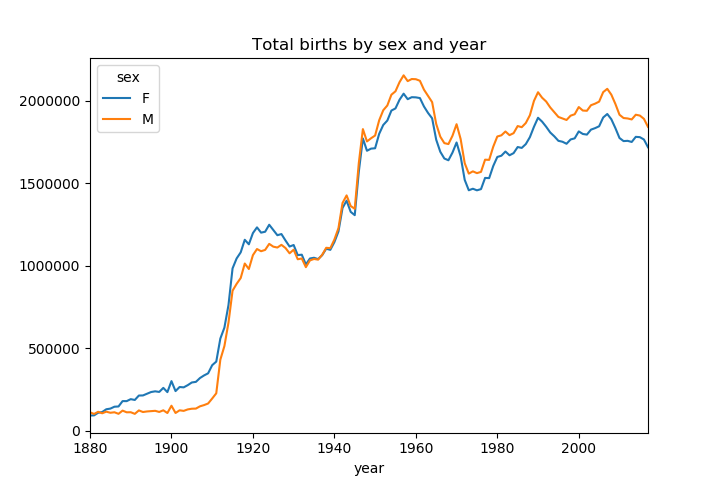

In [25]:
%matplotlib notebook

import matplotlib as mp

total_births.plot(title = 'Total births by sex and year')

In [11]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [12]:
names

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


In [13]:
def get_top1000(group):
    return group.sort_values(by= 'births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [14]:
top1000

names sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2017 M   1911793     Camron   M     203  2017  0.000110
         1911794     Decker   M     203  2017  0.000110
         1911795     Tyrone   M     203  2017  0.000110
         1911796     Howard   M     202  2017  0.000110
         1911797       Jaxx   M     202  2017  0.000110

[275877 rows x 5 columns]

In [15]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']


In [16]:
all_names = pd.Series(top1000.names.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [17]:
filtered = top1000[top1000.names.isin(lesley_like)]
filtered.groupby('names').births.sum()

names
Leslee       993
Lesley     35033
Lesli        929
Leslie    377571
Lesly      11433
Name: births, dtype: int64